<a href="https://colab.research.google.com/github/Manya123-max/Deep-Learning-Algorithms-/blob/main/DeepLab5_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model  # Import Model
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load Pre-trained Model (VGG16)
# Load VGG16 without the top fully connected layers, specify input shape
vgg_model = VGG16(
    weights='imagenet',
    include_top=False,  # Do not include the top fully connected layers
    input_shape=(224, 224, 3)
)

# Load ResNet50 without the top fully connected layers, specify input shape
resnet_model = ResNet50(
    weights='imagenet',
    include_top=False,  # Do not include the top fully connected layers
    input_shape=(224, 224, 3)
)

# Load MobileNetV2 without the top fully connected layers, specify input shape
mobilenet_model = MobileNetV2(
    weights='imagenet',
    include_top=False,  # Do not include the top fully connected layers
    input_shape=(224, 224, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


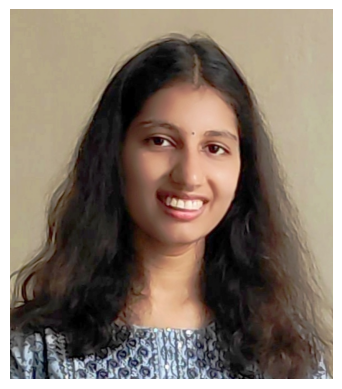

In [ ]:
# Step 2: Load and preprocess an image for prediction
img_path = '/content/drive/MyDrive/IMG_20231204_201103.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize image to 224x224

# Convert image to array and preprocess
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)  # Expand dimensions to match model input shape
x = preprocess_input(x)  # Preprocess the image as per the model requirements

# Display the original image
plt.imshow(image.load_img(img_path))
plt.axis('off')  # Hide axis for better visualization
plt.show()

In [ ]:
# VGG16
vgg_preds = vgg_model.predict(x)
# Add a GlobalAveragePooling2D layer to convert the 4D output to 2D
vgg_preds = GlobalAveragePooling2D()(vgg_preds)
# Add a Dense layer with 1000 units and softmax activation for classification
vgg_preds = Dense(1000, activation='softmax')(vgg_preds)
vgg_decoded = decode_predictions(vgg_preds, top=3)[0]

print('VGG16 Predictions:')
for i, (imagenet_id, label, score) in enumerate(vgg_decoded):
    print(f"{i + 1}: {label} (Confidence: {score:.2f})")

# ResNet50
resnet_preds = resnet_model.predict(x)
# Add a GlobalAveragePooling2D layer to convert the 4D output to 2D
resnet_preds = GlobalAveragePooling2D()(resnet_preds)
# Add a Dense layer with 1000 units and softmax activation for classification
resnet_preds = Dense(1000, activation='softmax')(resnet_preds)
resnet_decoded = decode_predictions(resnet_preds, top=3)[0]

print('ResNet50 Predictions:')
for i, (imagenet_id, label, score) in enumerate(resnet_decoded):
    print(f"{i + 1}: {label} (Confidence: {score:.2f})")

# MobileNetV2
mobilenet_preds = mobilenet_model.predict(x)
# Add a GlobalAveragePooling2D layer to convert the 4D output to 2D
mobilenet_preds = GlobalAveragePooling2D()(mobilenet_preds)
# Add a Dense layer with 1000 units and softmax activation for classification
mobilenet_preds = Dense(1000, activation='softmax')(mobilenet_preds)
mobilenet_decoded = decode_predictions(mobilenet_preds, top=3)[0]

print('MobileNetV2 Predictions:')
for i, (imagenet_id, label, score) in enumerate(mobilenet_decoded):
    print(f"{i + 1}: {label} (Confidence: {score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
VGG16 Predictions:
1: guinea_pig (Confidence: 0.29)
2: Chihuahua (Confidence: 0.11)
3: desktop_computer (Confidence: 0.06)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
ResNet50 Predictions:
1: flagpole (Confidence: 0.01)
2: mongoose (Confidence: 0.01)
3: tiger (Confidence: 0.01)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
MobileNetV2 Predictions:
1: rugby_ball (Confidence: 0.01)
2: jacamar (Confidence: 0.01)
3: banana (Confidence: 0.01)


In [ ]:
# Step 1: Set up paths to your dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your training dataset path
validation_dir = '/content/drive/MyDrive/vaild'  # Update with your validation dataset path

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Step 2: Prepare data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
# Step 3: Load Pre-trained Models (e.g., ResNet50)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Step 4: Add new layers for custom classification
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create the final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers of ResNet50
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 5: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Adjust the number of epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.5000 - loss: 1.1478 - val_accuracy: 0.5000 - val_loss: 8.0629
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: 8.0221 - val_accuracy: 0.5000 - val_loss: 5.4135
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 6.1542 - val_accuracy: 0.5000 - val_loss: 1.0352
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.6000 - loss: 0.7832 - val_accuracy: 0.7000 - val_loss: 0.5125
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5000 - loss: 2.6242 - val_accuracy: 0.5000 - val_loss: 0.9010
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 2.5173 - val_accuracy: 0.8000 - val_loss: 0.3511
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5500 - loss: 1.5135 - val_accuracy: 1.0000 - val_loss: 0.0374
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.9000 - loss: 0.2768 - val_accuracy: 1.0000 - val_loss: 0.0346
Epoch 9/10
1/1 ━━

In [ ]:
# Step 6: Fine-tune by unfreezing some layers
for layer in base_model.layers[-4:]:  # Unfreeze last 4 layers for fine-tuning
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5  # Fine-tuning epochs
)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.9000 - loss: 0.3517 - val_accuracy: 0.8000 - val_loss: 0.3867
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.7000 - loss: 0.5597 - val_accuracy: 0.8000 - val_loss: 0.3568
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.7000 - loss: 0.4283 - val_accuracy: 0.8000 - val_loss: 0.3295
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.7000 - loss: 0.4376 - val_accuracy: 0.8000 - val_loss: 0.3034
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.8000 - loss: 0.3479 - val_accuracy: 0.8000 - val_loss: 0.2797


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


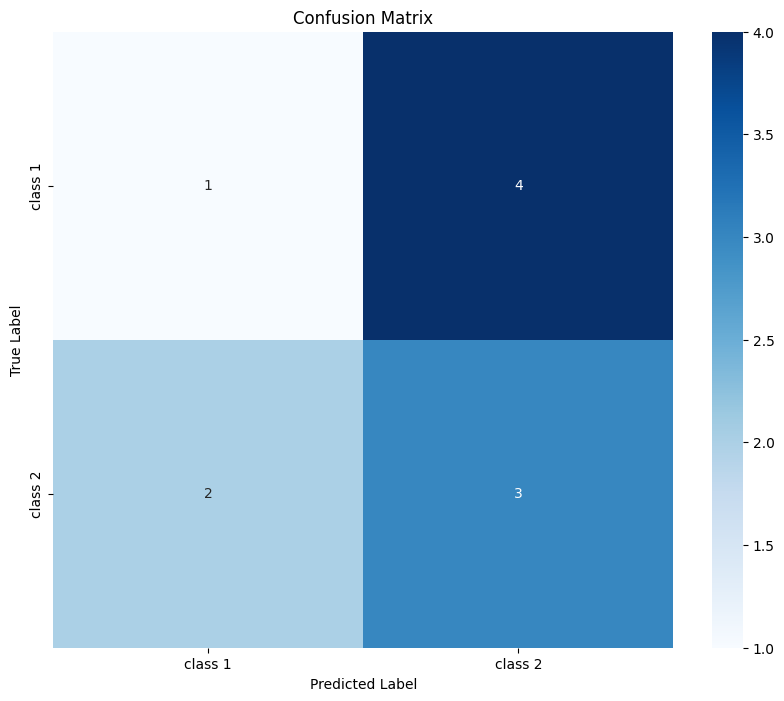

Classification Report:
               precision    recall  f1-score   support

     class 1       0.33      0.20      0.25         5
     class 2       0.43      0.60      0.50         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
# Get predictions and true labels from the validation generator
validation_generator.reset()  # Make sure the generator is reset for evaluation

# Make predictions on the validation data
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = validation_generator.classes

# Get class labels mapping
class_labels = list(validation_generator.class_indices.keys())

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 4: Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

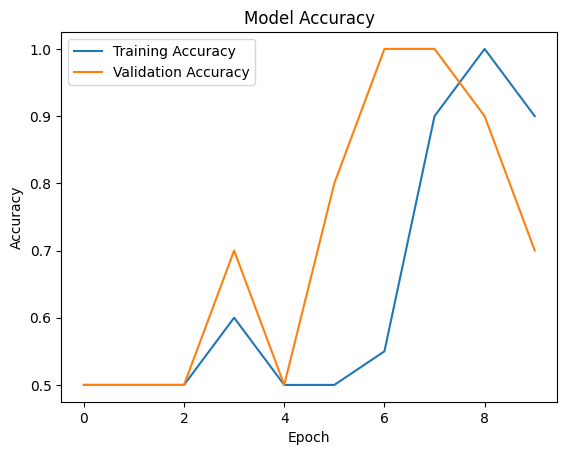

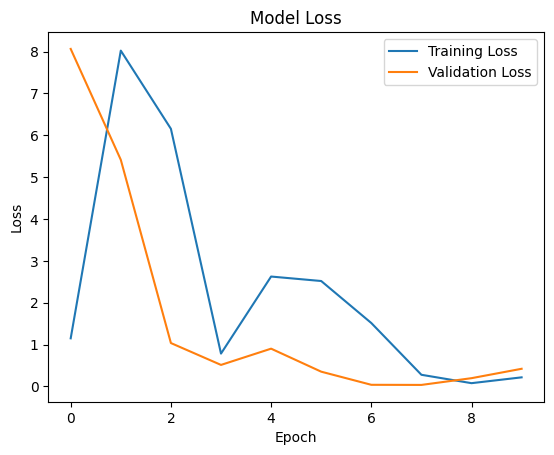

In [ ]:
# Step 7: Visualize training results (Optional)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()